In [39]:
import os
import numpy as np
import neuroglancer
from skimage import io
import matplotlib
from pprint import pprint
from matplotlib import pyplot as plt
from tqdm import tqdm
import cv2
from tifffile import imwrite

In [45]:
animal = 'DK52'
filename = 'allen_25um_sagittal.tiff'
#INPUT = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps/CH1/registered'
OUTPUT = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps/CH1/registered'
os.makedirs(OUTPUT, exist_ok=True)
INPUT = '/net/birdstore/Active_Atlas_Data/data_root/brains_info/registration'
filepath = os.path.join(INPUT, filename)
volume = io.imread(filepath)
print(f'Volume shape={volume.shape} dtype={volume.dtype}')

Volume shape=(320, 528, 456) dtype=uint16


In [44]:
sagittal = volume
sagittal = np.rot90(sagittal, axes=(1, 0))
sagittal = np.flip(sagittal, axis=1)
filepath = os.path.join(INPUT, 'allen_25um_sagittal.tiff')
print(sagittal.shape)
imwrite(filepath, sagittal)

(320, 528, 456)


  0%|                                                                                                                                                                                       | 0/5 [00:00<?, ?it/s]

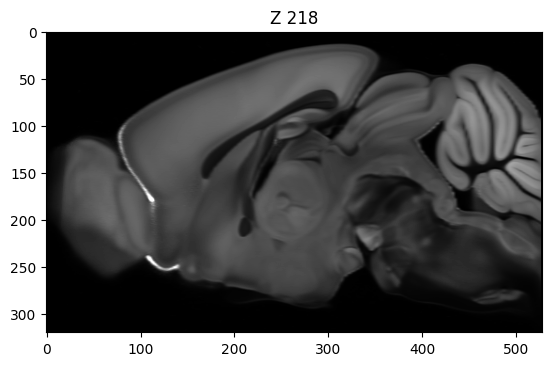

 20%|███████████████████████████████████                                                                                                                                            | 1/5 [00:00<00:00,  6.96it/s]

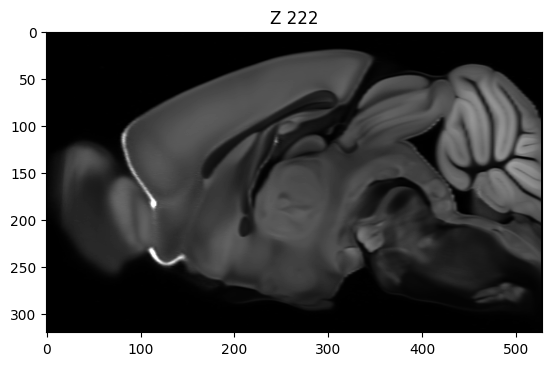

 40%|██████████████████████████████████████████████████████████████████████                                                                                                         | 2/5 [00:00<00:00,  7.22it/s]

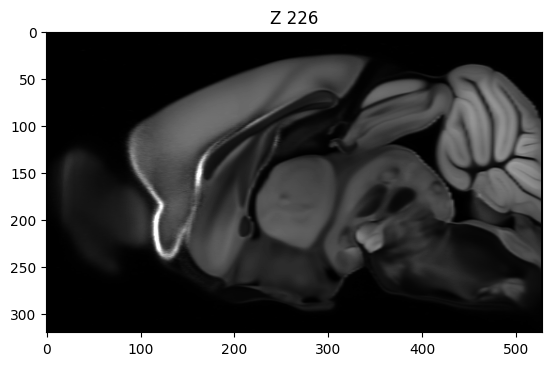

 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                      | 3/5 [00:00<00:00,  7.41it/s]

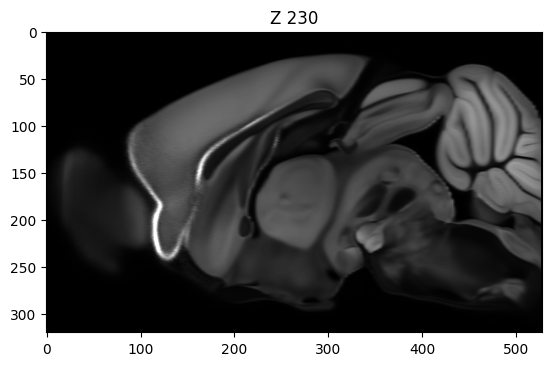

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 4/5 [00:00<00:00,  7.53it/s]

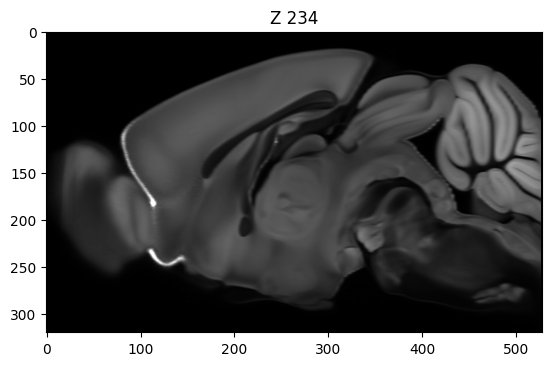

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.48it/s]


In [46]:
arr = volume
midpoint = arr.shape[2] // 2
limit = 10
start = midpoint - 10
end = midpoint + 10
for i in tqdm(range(start, end, 4)):
    plt.title('Z {}'.format(i))
    img = arr[:,:,i]
    #img = np.rot90(img, 1, axes=(1,0))
    #img = np.flip(img, axis=1)
    plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
image_stack = np.zeros(volume.shape)
file_list = []

for i in tqdm(range(0, volume.shape[2], 1)):
    img = volume[:,:,i]
    img = np.rot90(img, 1, axes=(1,0))
    img = np.flip(img, axis=1)
    filepath = os.path.join(OUTPUT, str(i).zfill(3) + '.tif')
    cv2.imwrite(filepath, img)

In [ ]:
# The default atlas created by brainreg is isotropic 25um
#vm2 = np.swapaxes(volume, 0, 2)
#vm2 = np.flip(vm2, axis=0)
vm2 = volume
print(f'new volume shape={vm2.shape}')
dimensions = neuroglancer.CoordinateSpace(
    names=['x', 'y', 'z'],
    units='um',
    scales=[25,25,25])
viewer = neuroglancer.Viewer()
with viewer.txn() as s:
    s.dimensions = dimensions
    s.layout = '4panel'
    s.layers['Allen'] = neuroglancer.ImageLayer(
        source=neuroglancer.LocalVolume(
            data=vm2,
            dimensions=dimensions,
            voxel_offset=(0, 0, 0),
        ))

print(viewer)